In [63]:
#We need to import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from scipy.stats import ttest_ind
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# We need to read the dataset into a Pandas DataFrame
df = pd.read_csv('QVI_transaction_data.csv')
dw = pd.read_csv('QVI_purchase_behaviour.csv')
print(df)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

In [3]:
# We need to read the dataset into a Pandas DataFrame
dw = pd.read_csv('QVI_purchase_behaviour.csv')
print(dw)

       LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]


In [4]:
# Exploratory data analysis 
#The first step in any analysis is to first understand the data. Let's take a look at each of the datasets provided.
print(df.info())
print(dw.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object

In [5]:
# Display Data Types and Missing Values: Check the data types of each column and identify missing values:
print(df.info())
print(df.isnull().sum())

#We can see from above that there are no missing data, null data and the data types are accurate except the column Date.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [6]:
# Display Data Types and Missing Values: Check the data types of each column and identify missing values:
print(dw.info())
print(dw.isnull().sum())
#We can see from above that there are no missing data, null data and the data types are accurate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [7]:
# We can see that the date column is in an integer format. Let's change this to a date format.
# Step 1: Convert the 'Joining_Date' column to a string
#df['DATE'] = df['DATE'].astype(str)

# Step 2: Convert the string to datetime format using pd.to_datetime
df['DATE'] = pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')

# Check the result
print(df)



             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [8]:
#We should check that we are looking at the right products by examining PROD_NAME

# Step 1: Load the dataset
print(df)

# Step 2: Check for null or missing values in the PROD_NAME column
missing_values = df['PROD_NAME'].isnull().sum()
print(f"Missing values in 'PROD_NAME': {missing_values}")

# Step 3: Count the total number of products
total_products = df['PROD_NAME'].count()
print(f"Total number of products: {total_products}")

# Step 4: Count the number of unique product names
unique_product_count = df['PROD_NAME'].nunique()
print(f"Number of unique product names: {unique_product_count}")

# Step 5: Find the most frequent product names
most_frequent_products = df['PROD_NAME'].value_counts().head(10)
print("\nMost frequent products:\n", most_frequent_products)

# Step 6: Basic descriptive stats (if needed)
prod_name_description = df['PROD_NAME'].describe()
print("\nBasic description of 'PROD_NAME':\n", prod_name_description)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [9]:
# We should check that we are looking at the right products by examining PROD_NAME. 
# Let us generate a summary of the PROD_NAME column.

# Step 1: Load the dataset
print(df)

# Step 2: Tokenize the product names into individual words
# Convert product names to lowercase and split by spaces
product_words = df['PROD_NAME'].str.lower().str.split()
print(product_words)

# Step 3: Flatten the list of lists into a single list of words
all_words = [word for product in product_words for word in product]

# Step 4: Count the frequency of each word
word_counts = Counter(all_words)

# Step 5: Get the most common words (top 20)
most_common_words = word_counts.most_common(20)

# Output the most common words
most_common_words



             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

[('175g', 60561),
 ('chips', 49770),
 ('150g', 43131),
 ('kettle', 41288),
 ('&', 35565),
 ('smiths', 28860),
 ('salt', 27976),
 ('cheese', 27890),
 ('pringles', 25102),
 ('134g', 25102),
 ('doritos', 24962),
 ('crinkle', 23960),
 ('110g', 22387),
 ('corn', 22063),
 ('original', 21560),
 ('cut', 20754),
 ('chip', 18645),
 ('170g', 18502),
 ('salsa', 18094),
 ('chicken', 15407)]

In [10]:
# Looks like we are definitely looking at potato chips but how can we check that these are all chips?
# We can do some basic text analysis by summarising the individual words in the product name.

# Step 1: Load the dataset
print(df)

# Step 2: Define keywords that indicate a product is a chip
chip_keywords = ['chips', 'crisps', 'potato']

# Step 3: Create a function to check if a product name contains any chip keywords
def is_chip_product(prod_name):
    # Convert product name to lowercase and split by spaces
    words = prod_name.lower().split()
    # Check if any chip keyword is in the product name
    return any(keyword in words for keyword in chip_keywords)

# Step 4: Apply the function to the PROD_NAME column and create a new column to flag non-chip products
df['is_chip_product'] = df['PROD_NAME'].apply(is_chip_product)

# Step 5: Filter out products that are not chips
non_chip_products = df[~df['is_chip_product']]

# Step 6: Display non-chip products
print("Non-chip products:\n", non_chip_products[['PROD_NAME']])

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [11]:
# Step 1: Load the dataset
print(df)

# Step 2: Tokenize the product names into individual words
# Convert product names to lowercase and split by spaces
product_words = df['PROD_NAME'].str.lower().str.split()

# Step 3: Flatten the list of lists into a single list of words
all_words = [word for product in product_words for word in product]

# Step 4: Define a function to remove words with digits or special characters
def is_clean_word(word):
    # Remove words that contain digits or special characters using regex
    return re.match("^[a-zA-Z]+$", word)

# Step 5: Filter the list of words to keep only alphabetic words
clean_words = [word for word in all_words if is_clean_word(word)]

# Step 6: Count the frequency of each word
word_counts = Counter(clean_words)

# Step 7: Sort the words by frequency of occurrence
sorted_word_counts = word_counts.most_common()

# Step 8: Display the top 20 most frequent clean words
print(sorted_word_counts[:20])


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [12]:
# There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.

# Step 1: Filter out products that contain the word 'salsa' in the product name
df_chips = df[~df['PROD_NAME'].str.contains('salsa', case=False, na=False)]

# Step 2: Check the result
print(df_chips['PROD_NAME'].unique())  # To see the remaining product names

print(df_chips)
# Optional: Save the cleaned dataset (if needed)
df_chips.to_csv('C:/Users/USER/Documents/Data Science/Quantium Project/cleaned_chips_data.csv', index=False)


['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Thins Chips         Originl saltd 175g'
 'Red Rock De

In [13]:
# Next, we can use `summary()` to check summary statistics such as mean, min and max values 
#for each feature to see if there are any obvious outliers in the data 
#and if there are any nulls in any of the columns (`NA's : number of nulls`will appear in the output if there are any nulls).
# Load your dataset (assuming it's already in a DataFrame named df_chips)
print (df_chips)

# Step 1: Summary statistics for numeric columns
summary_stats = df_chips.describe()

# Step 2: Check for null values (number of nulls in each column)
null_values = df_chips.isnull().sum()

# Step 3: Display results
print("Summary Statistics:\n", summary_stats)
print("\nNumber of Null Values in Each Column:\n", null_values)


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [14]:
#There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. 
#Let's investigate further the case where 200 packets of chips are bought in one transaction.

# Step 1: Filter the dataset to find transactions where the product quantity (PROD_QTY) is 200
outlier_transactions = df[df['PROD_QTY'] == 200]

# Step 2: Display the transactions with 200 packets bought
print(outlier_transactions)

# Step 3: Check for other details such as transaction date, customer details, and store details if needed
# For example, checking the unique customer IDs or stores involved in these transactions
unique_customers = outlier_transactions['LYLTY_CARD_NBR'].unique()
unique_stores = outlier_transactions['STORE_NBR'].unique()

print(f"Unique Customers Involved: {unique_customers}")
print(f"Unique Stores Involved: {unique_stores}")


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  is_chip_product  
69762  Dorito Corn Chp     Supreme 380g       200      650.0            False  
69763  Dorito Corn Chp     Supreme 380g       200      650.0            False  
Unique Customers Involved: [226000]
Unique Stores Involved: [226]


In [15]:
# Let's see if the customer has had other transactions

# Step 1: Identify the customer(s) who made the transaction with 200 packets
outlier_transactions = df_chips[df_chips['PROD_QTY'] == 200]
customer_ids = outlier_transactions['LYLTY_CARD_NBR'].unique()

# Step 2: Filter the dataset for all transactions made by the identified customer(s)
customer_transactions = df_chips[df_chips['LYLTY_CARD_NBR'].isin(customer_ids)]

# Step 3: Display the customer's transactions
print(customer_transactions)

# Optional: Analyze further, like seeing unique products or quantities bought by the customer
unique_products = customer_transactions['PROD_NAME'].unique()
print(f"Unique products bought by the customer: {unique_products}")


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  is_chip_product  
69762  Dorito Corn Chp     Supreme 380g       200      650.0            False  
69763  Dorito Corn Chp     Supreme 380g       200      650.0            False  
Unique products bought by the customer: ['Dorito Corn Chp     Supreme 380g']


In [16]:
#It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. 
#The customer might be buying chips for commercial purposes instead. 
#We'll remove this loyalty card number from further analysis.

# Step 1: Identify the customer to be removed (loyalty card number)
LYLTY_CARD_NBR_to_remove = 226000  

# Step 2: Filter the dataset to exclude the customer
df_filtered = df_chips[df_chips['LYLTY_CARD_NBR'] != LYLTY_CARD_NBR_to_remove]

# Step 3: Save the updated dataset
df_filtered.to_csv('filtered_dataset.csv', index=False)

# Step 4: Check the result
print(f"Customer {LYLTY_CARD_NBR_to_remove} removed from the dataset.")
print(df_filtered.head())  # Display the first few rows to verify

# Save the filtered dataset 
df_filtered.to_csv('C:/Users/USER/Documents/Data Science/Quantium Project/filtered_dataset.csv', index=False)


Customer 226000 removed from the dataset.
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

   is_chip_product  
0            False  
1            False  
2             True  
3            False  
4            False  


In [17]:
# Let us Re-examine transaction data
print(df_filtered.info())

print(df_filtered.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DATE             246740 non-null  datetime64[ns]
 1   STORE_NBR        246740 non-null  int64         
 2   LYLTY_CARD_NBR   246740 non-null  int64         
 3   TXN_ID           246740 non-null  int64         
 4   PROD_NBR         246740 non-null  int64         
 5   PROD_NAME        246740 non-null  object        
 6   PROD_QTY         246740 non-null  int64         
 7   TOT_SALES        246740 non-null  float64       
 8   is_chip_product  246740 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 17.2+ MB
None
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303

In [18]:
# That's better. Now, let's look at the number of transaction lines over time to see if there are any obvious data issues 
# such as missing data.


# Step 1: Group the dataset by the date and count the number of transactions for each day
transactions_per_day = df_filtered.groupby(df_filtered['DATE'].dt.date).size().reset_index(name='Transaction_Count')

# Step 2: Display the result
print(transactions_per_day)


           DATE  Transaction_Count
0    2018-07-01                663
1    2018-07-02                650
2    2018-07-03                674
3    2018-07-04                669
4    2018-07-05                660
..          ...                ...
359  2019-06-26                657
360  2019-06-27                669
361  2019-06-28                673
362  2019-06-29                703
363  2019-06-30                704

[364 rows x 2 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_4484\2940593059.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'], errors='coerce')


Missing Dates:
177   2018-12-25
Name: DATE, dtype: datetime64[ns]


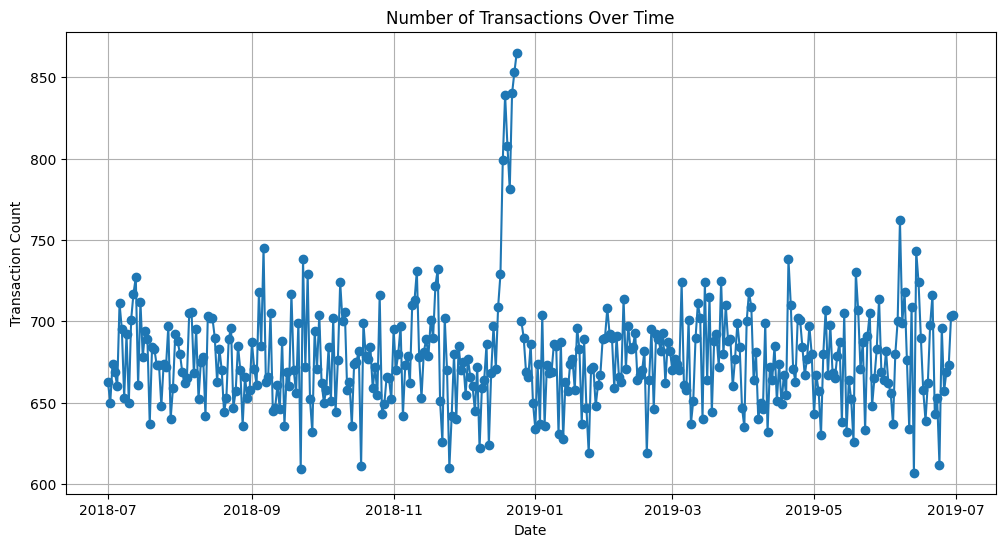

In [19]:
# There's only 364 rows, meaning only 364 dates which indicates a missing date. 
# Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions 
#over time to find the missing date.

# Step 1: Create a date range from 1st July 2018 to 30th June 2019
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Step 2: Ensure the 'DATE' column in the dataset is in datetime format
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'], errors='coerce')

# Step 3: Count the number of transactions per date
transactions_per_day = df_filtered.groupby(df_filtered['DATE'].dt.date).size().reset_index(name='Transaction_Count')

# Step 4: Convert the 'DATE' column back to datetime for merging
transactions_per_day['DATE'] = pd.to_datetime(transactions_per_day['DATE'])

# Step 5: Merge the full date range with the transaction data to find missing dates
full_date_df = pd.DataFrame(date_range, columns=['DATE'])
merged_df = pd.merge(full_date_df, transactions_per_day, on='DATE', how='left')

# Step 6: Identify the missing dates
missing_dates = merged_df[merged_df['Transaction_Count'].isnull()]['DATE']
print(f"Missing Dates:\n{missing_dates}")

# Step 7: Plot the number of transactions over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['DATE'], merged_df['Transaction_Count'], label='Number of Transactions', marker='o')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()


          DATE  Transaction_Count
0   2018-07-01              663.0
1   2018-07-02              650.0
2   2018-07-03              674.0
3   2018-07-04              669.0
4   2018-07-05              660.0
..         ...                ...
360 2019-06-26              657.0
361 2019-06-27              669.0
362 2019-06-28              673.0
363 2019-06-29              703.0
364 2019-06-30              704.0

[365 rows x 2 columns]


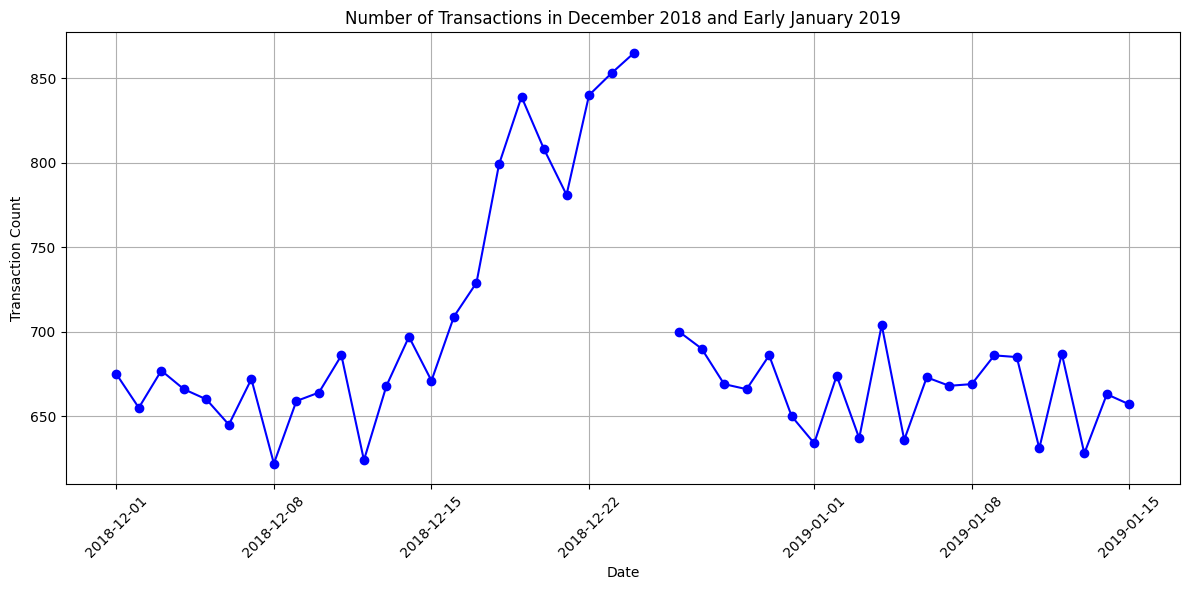

In [20]:
# We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.
print (merged_df)

# Step 1: Filter the dataset for December 2018 to early January 2019
december_data = merged_df[(merged_df['DATE'] >= '2018-12-01') & (merged_df['DATE'] <= '2019-01-15')]

# Step 2: Plot the number of transactions over time for December 2018 and early January 2019
plt.figure(figsize=(12, 6))
plt.plot(december_data['DATE'], december_data['Transaction_Count'], label='Number of Transactions', marker='o', color='blue')
plt.title('Number of Transactions in December 2018 and Early January 2019')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [21]:
# We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. 
#This is due to shops being closed on Christmas day. Now that we are satisfied that the data no longer has outliers, 
# we can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will start with pack size.
# firstly let us reload the latest filtered dataset. 
df_new = pd.read_csv('filtered_dataset.csv')
print(df_new)

# Step 1: Extract pack size using regular expression (looks for numbers followed by 'g')
df_new['PACK_SIZE'] = df_new['PROD_NAME'].str.extract(r'(\d+)(?=g)', expand=False).astype(float)

# Step 2: Check the result
print(df_new[['PROD_NAME', 'PACK_SIZE']].head())

# Save the pack size dataset 
df_new['PACK_SIZE'].to_csv('C:/Users/USER/Documents/Data Science/Quantium Project/packsize_dataset.csv', index=False)


              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       2018-10-17          1            1000       1         5   
1       2019-05-14          1            1307     348        66   
2       2019-05-20          1            1343     383        61   
3       2018-08-17          2            2373     974        69   
4       2018-08-18          2            2426    1038       108   
...            ...        ...             ...     ...       ...   
246735  2019-03-09        272          272319  270088        89   
246736  2018-08-13        272          272358  270154        74   
246737  2018-11-06        272          272379  270187        51   
246738  2018-12-27        272          272379  270188        42   
246739  2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g 

In [22]:
#  Let's check if the pack sizes look sensible 

# Step 1: Summary statistics for the 'PACK_SIZE' column
pack_size_summary = df_new['PACK_SIZE'].describe()

# Step 2: Check for unique values in 'PACK_SIZE'
unique_pack_sizes = df_new['PACK_SIZE'].unique()

# Step 3: Identify potential outliers by checking for extreme values
outlier_pack_sizes = df_new[df_new['PACK_SIZE'] > 1000]  # Adjust threshold if necessary

# Step 4: Display the results
print("Pack Size Summary:\n", pack_size_summary)
print("\nUnique Pack Sizes:\n", unique_pack_sizes)
print("\nPotential Outlier Pack Sizes:\n", outlier_pack_sizes[['PROD_NAME', 'PACK_SIZE']])


Pack Size Summary:
 count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

Unique Pack Sizes:
 [175. 170. 150. 330. 210.  nan 270. 220. 125. 110. 134. 380. 180. 165.
 135. 250. 200. 160. 190.  90.  70.]

Potential Outlier Pack Sizes:
 Empty DataFrame
Columns: [PROD_NAME, PACK_SIZE]
Index: []


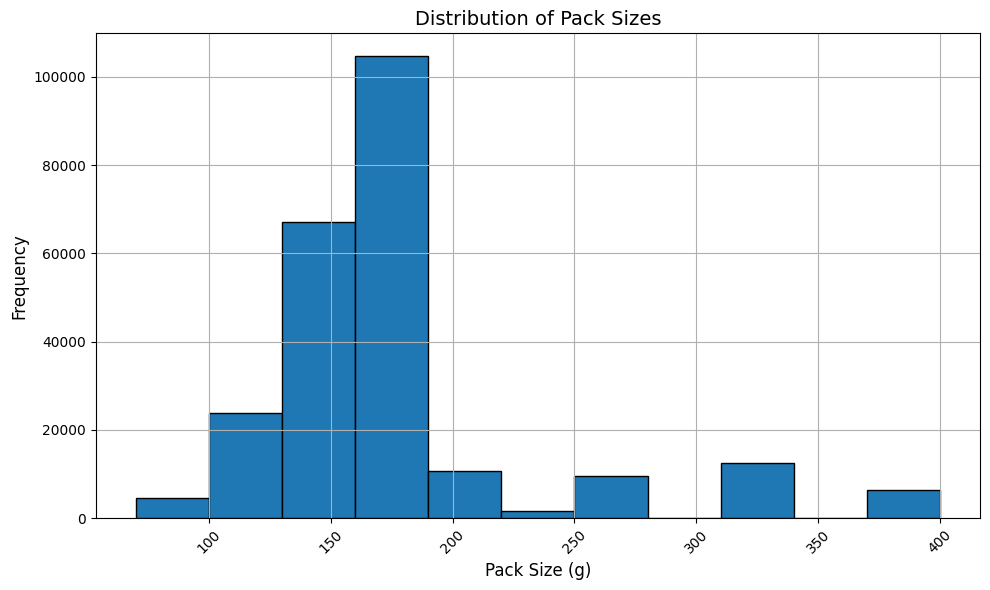

In [23]:
# The largest size is 380g and the smallest size is 70g - seems sensible!

# Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable 
# and not a continuous variable even though it is numeric.

# Step 1: Drop NaN values from PACK_SIZE for the purpose of the plot
df_cleaned = df_new.dropna(subset=['PACK_SIZE'])

# Step 2: Plot histogram of PACK_SIZE
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['PACK_SIZE'], bins=range(int(df_cleaned['PACK_SIZE'].min()), int(df_cleaned['PACK_SIZE'].max()) + 30, 30), edgecolor='black')

# Step 3: Customize the plot
plt.title('Distribution of Pack Sizes', fontsize=14)
plt.xlabel('Pack Size (g)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Step 4: Show the plot
plt.show()


In [24]:
# Function to extract the first two words (brand)
def extract_brand(prod_name):
    # Use regex to capture the first two words
    match = re.match(r'^(\w+\s\w+)', prod_name)
    if match:
        return match.group(0)
    return None


# Apply the function to your dataframe
df['BRAND'] = df_new['PROD_NAME'].apply(extract_brand)

# View the updated dataframe
df[['PROD_NAME', 'BRAND']].head(93)


,PROD_NAME,BRAND
0,Natural Chip Compny SeaSalt175g,Natural Chip
1,CCs Nacho Cheese 175g,CCs Nacho
2,Smiths Crinkle Cut Chips Chicken 170g,Smiths Crinkle
3,Smiths Chip Thinly S/Cream&Onion 175g,Smiths Chip
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle Tortilla
...,...,...
88,Doritos Corn Chips Cheese Supreme 170g,Doritos Mexicana
89,Pringles Original Crisps 134g,Thins Potato
90,Kettle Chilli 175g,Cobs Popd
91,Kettle Original 175g,WW Crinkle


In [25]:
### Some of the brand names look like they are of the same brands - 
# such as RED and RRD, which are both Red Rock Deli chips. Let's combine these together.

# Replace a portion of words in 'prod_name' column (e.g., replace 'RRD' with 'Red Rock Deli')
df_new['PROD_NAME'] = df_new['PROD_NAME'].str.replace('RRD', 'Red Rock Deli') 

# Display updated DataFrame
df_new['PROD_NAME'].head(86)
df_new.head(85)
                          

# Save the updated dataset 
df_new.to_csv('C:/Users/USER/Documents/Data Science/Quantium Project/cleaned_transaction_dataset.csv', index=False)

In [26]:
#Lets do some basic summaries of the dataset, including distributions of any key columns.
df_fresh = pd.read_csv('cleaned_transaction_dataset.csv')
print (df_fresh)

# Display basic information about the dataset
print("Basic Information:")
print(df_fresh.info())

#Summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(df_fresh.describe())



              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       2018-10-17          1            1000       1         5   
1       2019-05-14          1            1307     348        66   
2       2019-05-20          1            1343     383        61   
3       2018-08-17          2            2373     974        69   
4       2018-08-18          2            2426    1038       108   
...            ...        ...             ...     ...       ...   
246735  2019-03-09        272          272319  270088        89   
246736  2018-08-13        272          272358  270154        74   
246737  2018-11-06        272          272379  270187        51   
246738  2018-12-27        272          272379  270188        42   
246739  2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g 

In [27]:
# Merge transaction data to customer data

# Load the datasets
transaction_data = pd.read_csv('cleaned_transaction_dataset.csv')
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')

# Display the first few rows to understand the structure
print("Transaction Data:")
print(transaction_data.head())

print("\nCustomer Data:")
print(customer_data.head())

# Merge the data on the common column, 'LYLTY_CARD_NBR'
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='inner')

# Display the merged data
print("\nMerged Data:")
print(merged_data.head())

# Let's also check if some customers were not matched on by checking for nulls.

print(merged_data.info())
print(merged_data.isnull().sum())
# Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

# Save the updated dataset 
merged_data.to_csv('C:/Users/USER/Documents/Data Science/Quantium Project/merged_dataset.csv', index=False)

# Data exploration is now complete!

Transaction Data:
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  2018-10-17          1            1000       1         5   
1  2019-05-14          1            1307     348        66   
2  2019-05-20          1            1343     383        61   
3  2018-08-17          2            2373     974        69   
4  2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

   is_chip_product  PACK_SIZE  
0            False      175.0  
1            False      175.0  
2             True      170.0  
3            False      175.0  
4            False      150.0  

Custome

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   33345.70
1   MIDAGE SINGLES/COUPLES       Mainstream   84734.25
2   MIDAGE SINGLES/COUPLES          Premium   54443.85
3             NEW FAMILIES           Budget   20607.45
4             NEW FAMILIES       Mainstream   15979.70
5             NEW FAMILIES          Premium   10760.80
6           OLDER FAMILIES           Budget  156863.75
7           OLDER FAMILIES       Mainstream   96413.55
8           OLDER FAMILIES          Premium   75242.60
9    OLDER SINGLES/COUPLES           Budget  127833.60
10   OLDER SINGLES/COUPLES       Mainstream  124648.50
11   OLDER SINGLES/COUPLES          Premium  123537.55
12                RETIREES           Budget  105916.30
13                RETIREES       Mainstream  145168.95
14                RETIREES          Premium   91296.65
15          YOUNG FAMILIES           Budget  129717.95
16          YOUNG FAMILIES       Mainstream   86338.25
17        

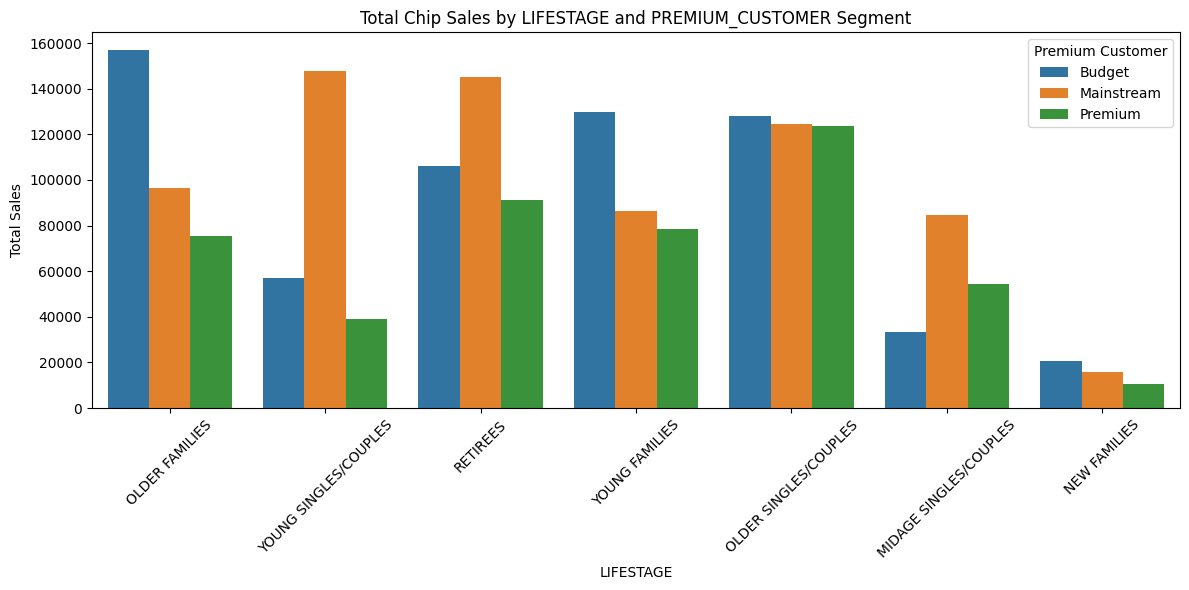

In [28]:
# Data analysis on customer segments 
# Calculate total sales by 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
# Using the column 'TOT_SALES' representing the amount spent on chips per transaction
total_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print(total_sales)

# Sort the data for better visualization
total_sales = total_sales.sort_values(by='TOT_SALES', ascending=False)
print(total_sales)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(data=total_sales, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Chip Sales by LIFESTAGE and PREMIUM_CUSTOMER Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()


Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER Segment:
                 LIFESTAGE PREMIUM_CUSTOMER  num_customers
0   MIDAGE SINGLES/COUPLES           Budget           1474
1   MIDAGE SINGLES/COUPLES       Mainstream           3298
2   MIDAGE SINGLES/COUPLES          Premium           2369
3             NEW FAMILIES           Budget           1087
4             NEW FAMILIES       Mainstream            830
5             NEW FAMILIES          Premium            575
6           OLDER FAMILIES           Budget           4611
7           OLDER FAMILIES       Mainstream           2788
8           OLDER FAMILIES          Premium           2231
9    OLDER SINGLES/COUPLES           Budget           4849
10   OLDER SINGLES/COUPLES       Mainstream           4858
11   OLDER SINGLES/COUPLES          Premium           4682
12                RETIREES           Budget           4385
13                RETIREES       Mainstream           6358
14                RETIREES          Premium         

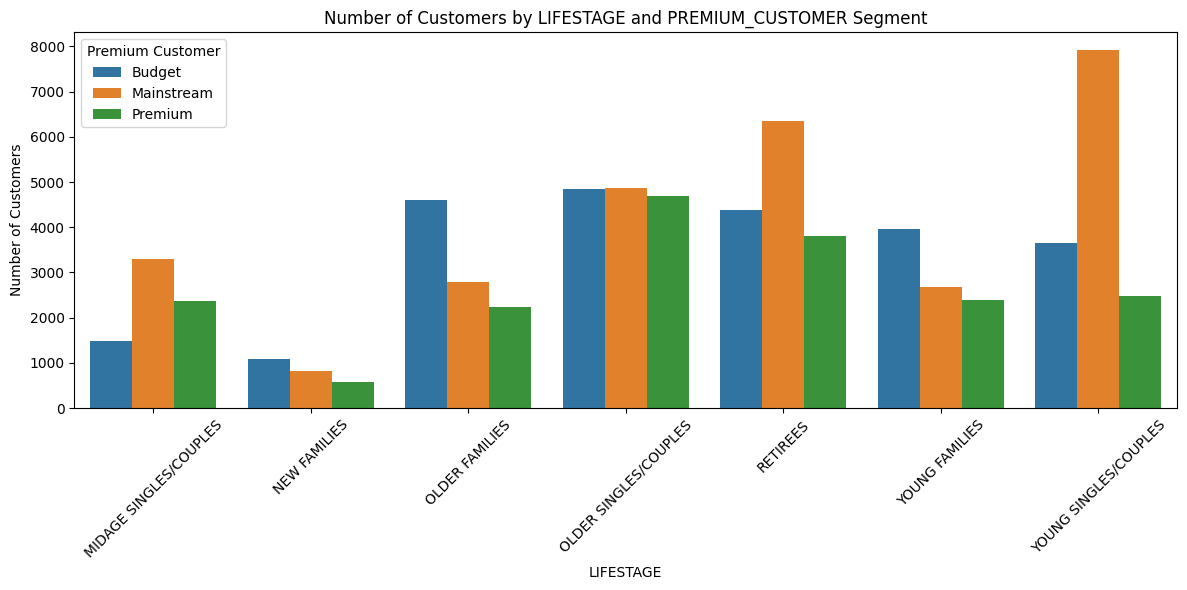

In [29]:
#Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees
#Let's see if the higher sales are due to there being more customers who buy chips.

# Calculate the number of unique customers by 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
# The column 'LYLTY_CARD_NBR' represents unique customer identifiers
customer_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customer_summary.rename(columns={'LYLTY_CARD_NBR': 'num_customers'}, inplace=True)
print("Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER Segment:")
print(customer_summary)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_summary, x='LIFESTAGE', y='num_customers', hue='PREMIUM_CUSTOMER')
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

Average Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER Segment:
                 LIFESTAGE PREMIUM_CUSTOMER  avg_units_per_customer
0   MIDAGE SINGLES/COUPLES           Budget                  1474.0
1   MIDAGE SINGLES/COUPLES       Mainstream                  3298.0
2   MIDAGE SINGLES/COUPLES          Premium                  2369.0
3             NEW FAMILIES           Budget                  1087.0
4             NEW FAMILIES       Mainstream                   830.0
5             NEW FAMILIES          Premium                   575.0
6           OLDER FAMILIES           Budget                  4611.0
7           OLDER FAMILIES       Mainstream                  2788.0
8           OLDER FAMILIES          Premium                  2231.0
9    OLDER SINGLES/COUPLES           Budget                  4849.0
10   OLDER SINGLES/COUPLES       Mainstream                  4858.0
11   OLDER SINGLES/COUPLES          Premium                  4682.0
12                RETIREES           Budget   

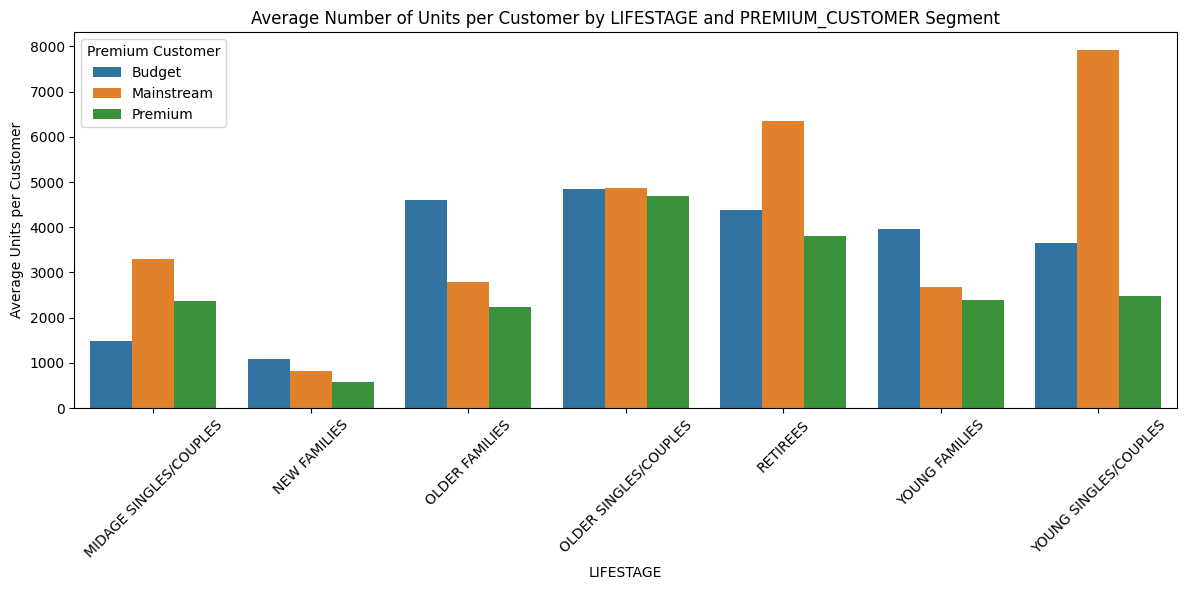

In [30]:
#There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. 
#This contributes to there being more sales to these customer segments but this is not a major driver 
#for the Budget - Older families segment. Higher sales may also be driven by more units of chips being 
#bought per customer. Let's have a look at this next.

## Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER 
#Calculate and plot the average number of units per customer by those two dimensions.

# Calculate total units and number of unique customers per segment
# Assuming 'units' column represents the number of units in each transaction
total_units = customer_summary.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['num_customers'].sum().reset_index(name='total_units')
unique_customers = customer_summary.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['num_customers'].nunique().reset_index(name='num_customers')

# Merge the total units and customer count to calculate the average units per customer
summary = pd.merge(total_units, unique_customers, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])
summary['avg_units_per_customer'] = summary['total_units'] / summary['num_customers']
# Display the calculated average units per customer
print("Average Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER Segment:")
print(summary[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'avg_units_per_customer']])

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='LIFESTAGE', y='avg_units_per_customer', hue='PREMIUM_CUSTOMER')
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Units per Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER Segment:
                 LIFESTAGE PREMIUM_CUSTOMER  avg_price_per_unit
0   MIDAGE SINGLES/COUPLES           Budget            3.753878
1   MIDAGE SINGLES/COUPLES       Mainstream            3.994449
2   MIDAGE SINGLES/COUPLES          Premium            3.780823
3             NEW FAMILIES           Budget            3.931969
4             NEW FAMILIES       Mainstream            3.935887
5             NEW FAMILIES          Premium            3.886168
6           OLDER FAMILIES           Budget            3.747969
7           OLDER FAMILIES       Mainstream            3.736380
8           OLDER FAMILIES          Premium            3.717703
9    OLDER SINGLES/COUPLES           Budget            3.887529
10   OLDER SINGLES/COUPLES       Mainstream            3.822753
11   OLDER SINGLES/COUPLES          Premium            3.897698
12                RETIREES           Budget            3.932731
13                RETIREES       Mains

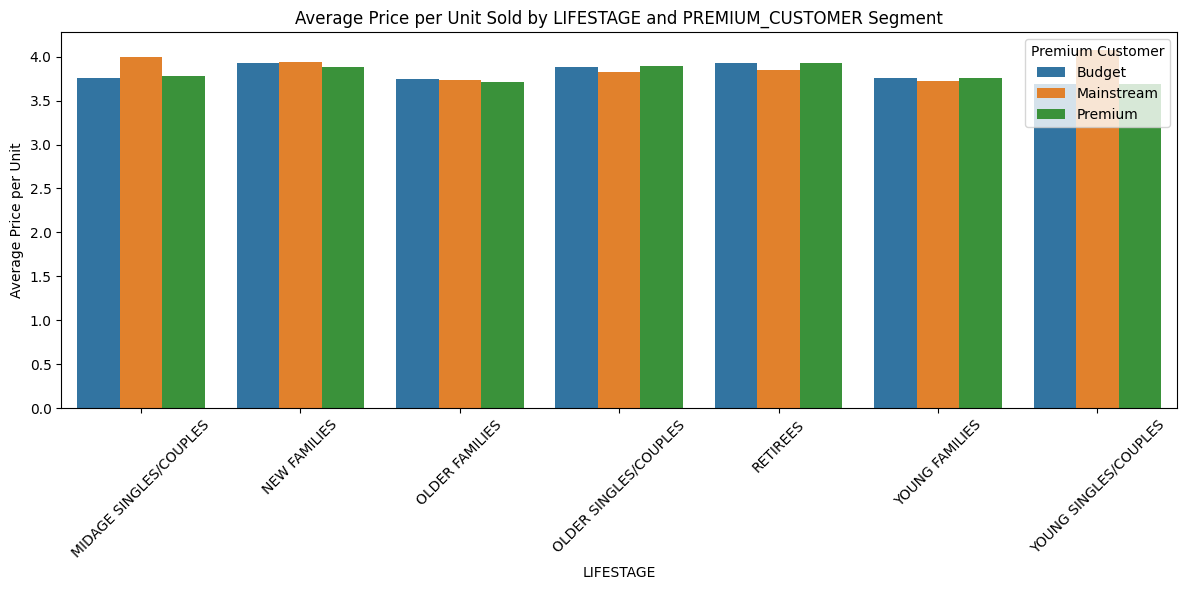

In [38]:
#Older families and young families in general buy more chips per customer 
#Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.


# Calculate total sales and total units by LIFESTAGE and PREMIUM_CUSTOMER
# Using 'TOT_SALES' column represents total sales amount and 'units' represents the quantity sold
total_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index(name='total_sales')
total_units = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index(name='total_units')

# Merge the total sales and total units to calculate the average price per unit
summary = pd.merge(total_sales, total_units, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])
summary['avg_price_per_unit'] = summary['total_sales'] / summary['total_units']

# Display the result
print("Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER Segment:")
print(summary[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'avg_price_per_unit']])

# Plotting the average price per unit
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='LIFESTAGE', y='avg_price_per_unit', hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit Sold by LIFESTAGE and PREMIUM_CUSTOMER Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

In [60]:
#Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget 
#and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks 
#and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. 
#This is also supported by there being fewer premium midage and young singles and couples buying chips compared to 
#their mainstream counterparts. As the difference in average price per unit isn't large, we can check if this 
#difference is statistically different. 

# Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples


# Load the dataset
# Replace 'sales_data.csv' with your actual dataset path or data variable
data = pd.read_csv('merged_dataset.csv')

# Filter data by customer segment and lifestage
# Assuming 'PREMIUM_CUSTOMER' column with values 'mainstream' or 'premium'
# and 'LIFESTAGE' column with categories like 'budget midage' and 'young singles/couples'

# For the 'mainstream' vs 'premium' test
mainstream_data = data[data['PREMIUM_CUSTOMER'] == 'Mainstream']['TOT_SALES']  # Replace 'sales' with the numeric column of interest
premium_data = data[data['PREMIUM_CUSTOMER'] == 'Premium']['TOT_SALES']

# Perform the t-test between mainstream and premium
t_stat_main_prem, p_val_main_prem = ttest_ind(mainstream_data, premium_data, equal_var=False)
print("T-test between Mainstream and Premium customers:")
print(f"T-statistic: {t_stat_main_prem}, P-value: {p_val_main_prem}")

# For the 'budget midage' vs 'young singles/couples' test
budget_midage_data = data[(data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Budget')]['TOT_SALES']
young_singles_couples_data = data[data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']['TOT_SALES']

# Perform the t-test between budget midage and young singles/couples
t_stat_budget_young, p_val_budget_young = ttest_ind(budget_midage_data, young_singles_couples_data, equal_var=False)
print("\nT-test between Budget Midage and Young Singles/Couples:")
print(f"T-statistic: {t_stat_budget_young}, P-value: {p_val_budget_young}")

T-test between Mainstream and Premium customers:
T-statistic: 7.259365170047673, P-value: 3.909397226498493e-13

T-test between Budget Midage and Young Singles/Couples:
T-statistic: -1.7151953305513548, P-value: 0.08635995370313147


In [61]:
#The t-test results in a p-value of 3.909397226498493e-13, i.e. the unit price for mainstream, young and mid-age singles and couples 
#[ARE / ARE NOT] significantly higher than that of budget or premium, young and midage singles and couples.

# T-test between Mainstream and Premium customers
#T-statistic: 7.259365170047673- This high T-statistic suggests a substantial difference between the two groups.
#P-value: 3.909397226498493e-13- This extremely low P-value indicates that the difference is statistically significant, 
#meaning it's very unlikely to have occurred by chance.
# Interpretation-*Statistical Significance*: The results show a significant difference between Mainstream and Premium customers. 
#This could imply that these two groups differ meaningfully in the metric you're analyzing (e.g., spending habits, satisfaction levels).


# T-test between Budget Midage and Young Singles/Couples
#T-statistic: -1.7151953305513548- The negative T-statistic suggests that the mean value for Budget Midage is lower than 
#for Young Singles/Couples.
#P-value: 0.08635995370313147- This P-value is above the common threshold of 0.05,indicating that the difference is not 
#statistically significant.
# Interpretation- *Lack of Statistical Significance*: The results suggest no significant difference between Budget Midage 
#and Young Singles/Couples. Any observed difference in the metric is likely due to random variation rather than a true underlying difference.

# Practical Implications
# *Mainstream vs. Premium*: Since the difference is significant, you might want to explore what drives this difference. 
#Are Premium customers spending more? Are they more satisfied? Understanding this can help tailor marketing strategies or 
#improve customer service.
# *Budget Midage vs. Young Singles/Couples*: Since there's no significant difference, it might not be necessary to treat 
#these groups differently based on the metric analyzed. However, further investigation could reveal other areas where they 
#differ.



#We might want to target customer segments that contribute the most to sales to retain them or further increase sales. 
#Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

In [95]:

# Filter data for the two customer segments: e.g., 'mainstream' and 'premium'
mainstream_data = data[data['PREMIUM_CUSTOMER'] == 'Mainstream']
premium_data = data[data['PREMIUM_CUSTOMER'] == 'Premium']

# Function to preprocess data for Apriori analysis
def preprocess_for_apriori(df, group_col, item_col):
    """
    Transforms data into a one-hot encoded format suitable for Apriori analysis.
    group_col: Column to group by (e.g., transaction ID or customer segment)
    item_col: Column representing the items (e.g., brand)
    """
    # Create a one-hot encoding for items purchased in each transaction
    basket = df.groupby([group_col, item_col]).size().unstack(fill_value=0)
    # Convert values >0 to 1 (binary encoding)
    return basket.applymap(lambda x: 1 if x > 0 else 0)

# Preprocess data for mainstream and premium segments
mainstream_basket = preprocess_for_apriori(mainstream_data, 'LYLTY_CARD_NBR', 'PROD_NAME')
premium_basket = preprocess_for_apriori(premium_data, 'LYLTY_CARD_NBR', 'PROD_NAME')

# Apply Apriori analysis for both segments
mainstream_frequent = apriori(mainstream_basket, min_support=0.01, use_colnames=True)
premium_frequent = apriori(premium_basket, min_support=0.01, use_colnames=True)

# Generate association rules
mainstream_rules = association_rules(mainstream_frequent, metric="lift", min_threshold=1,num_itemsets=1 )
premium_rules = association_rules(premium_frequent, metric="lift", min_threshold=1, num_itemsets=1)


# Display top brand preferences based on support and lift
print("Mainstream Customer Segment - Top Preferences:")
print(mainstream_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())

print("\nPremium Customer Segment - Top Preferences:")
print(premium_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())





C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Mainstream Customer Segment - Top Preferences:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []

Premium Customer Segment - Top Preferences:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []
